<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on Chipotle's order data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
movies.duration.isnull().sum()
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
movies.duration.sort_values().head()

389    64
338    66
258    67
293    68
88     68
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

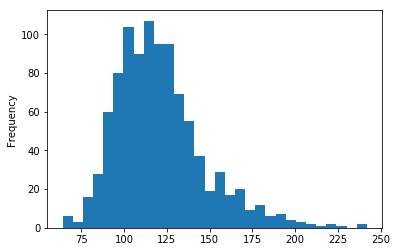

In [8]:
movies.duration.describe()
movies.duration.plot(kind = 'hist', bins = 30)

#### Use a box plot to display that same data.

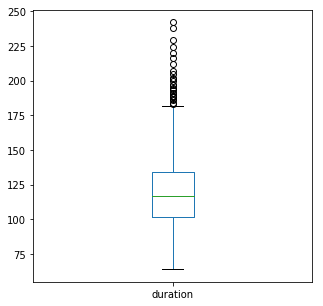

In [9]:
movies.duration.plot(kind = 'box',figsize=(5,5))

In [10]:
movies.describe()
movies[movies.duration>175].title.value_counts().sum()

40L

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

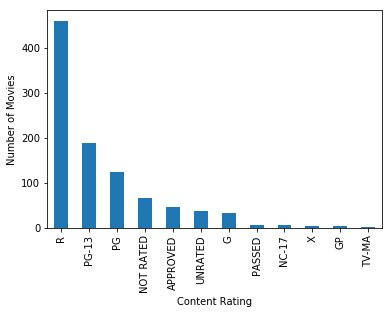

In [12]:
ax = movies.content_rating.value_counts().plot(kind='bar')
ax.set_xlabel("Content Rating")
ax.set_ylabel("Number of Movies")


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
find_cont = ["NOT RATED","APPROVED","PASSED","GP"]
movies.content_rating = movies.content_rating.replace(find_cont,"UNRATED")

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
find_cont = ['X','TV-MA']
movies.content_rating = movies.content_rating.replace(find_cont,'NC-17')

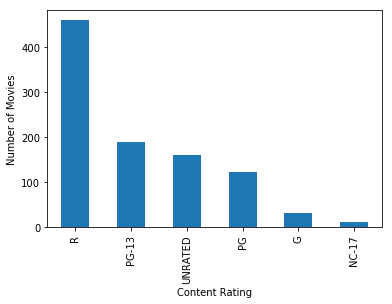

In [15]:
ax = movies.content_rating.value_counts().plot(kind='bar')
ax.set_xlabel("Content Rating")
ax.set_ylabel("Number of Movies")

#### Count the number of missing values in each column.

In [16]:
#movies[movies.content_rating == "TV-MA"]
#movies.content_rating.value_counts()
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
#missing_mask = movies.content_rating.isnull()
movies['title'].content_rating = movies.content_rating.fillna(value = "PG-13",inplace=True)
movies.content_rating.isnull().sum()

0

In [18]:
movies[movies['title'] == 'Where Eagles Dare']  #for example we pick.

,star_rating,title,content_rating,genre,duration,actors_list
649,7.7,Where Eagles Dare,PG-13,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
mean_long = movies[movies.duration > 120].star_rating.mean()
mean_short = movies[movies.duration < 120].star_rating.mean()
print("Avg rating: {0} for long movies, {1} for short movies".format(mean_long, mean_short))

Avg rating: 7.95366972477 for long movies, 7.83866666667 for short movies


#### Use a visualization to detect whether there is a relationship between duration and star rating.

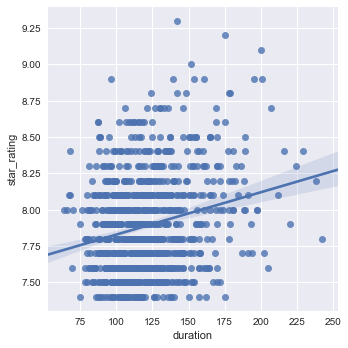

In [67]:
#movies.plot(kind = 'scatter', x = 'star_rating', y='duration')
#we could do somethink like lmplot for more advanced methods.

import seaborn as sns
#movies.plot(x="duration", y='star_rating', kind='scatter' , figsize=(15,7))
sns.lmplot(x="duration", y='star_rating', data=movies)

#### Calculate the average duration for each genre.

In [62]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

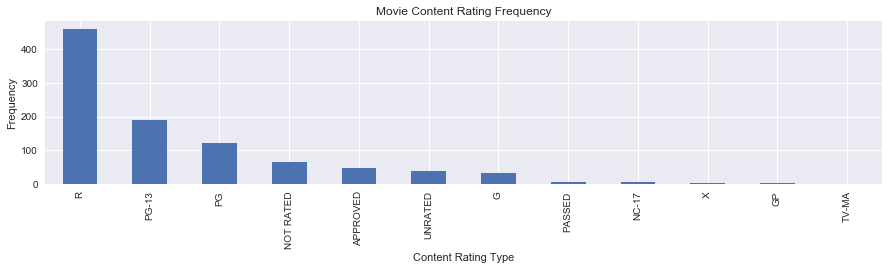

In [140]:
#Option 1
#sample = movies.groupby('content_rating').duration.mean()

#ax = sample.plot(kind='bar')
#ax.set_xlabel('Content Rating', fontsize=16)
#ax.set_ylabel('Average Duration', fontsize=16)
#or...
movies.content_rating.value_counts().plot(kind='bar', figsize=(15,3))
plt.ylabel('Frequency')
plt.xlabel('Content Rating Type')
plt.title('Movie Content Rating Frequency')


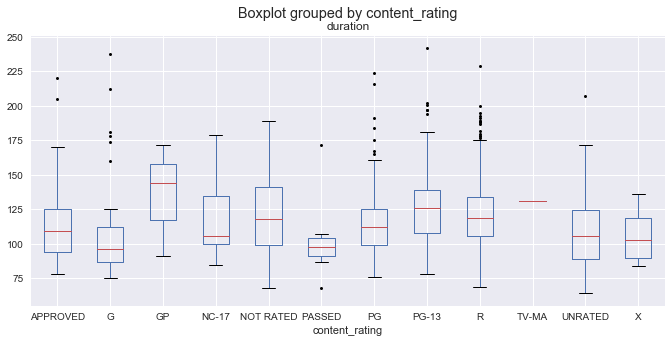

In [156]:
#OPtion 2 by BOXPLOT content rating and duration plot
movies.boxplot(column='duration', by='content_rating',figsize=(11,5),sym='k.')


#### Determine the top rated movie (by star rating) for each genre.

In [116]:
#This is incorrect my first attempt because it picks out a max on title and star'title'
movies.groupby(by=['genre'],sort=False)[ 'title','star_rating'].max().head(11)



,title,star_rating
genre,,
Crime,Zodiac,9.3
Action,Yojimbo,9.0
Drama,Zulu,8.9
Western,Unforgiven,8.9
Adventure,True Grit,8.9
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Animation,Wreck-It Ralph,8.6
Mystery,Vertigo,8.6


In [117]:
movies[movies['title']=='Zodiac']
# Zodiac has a very low star rating so the above solution though intuitive is incorrect.

,star_rating,title,content_rating,genre,duration,actors_list
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."


In [120]:
#This is a way to look . Now we shouls make lists of the tops ones 
movies.groupby(by=['genre','star_rating','title'],sort=False)[ 'title'].max().head()

genre   star_rating  title                   
Crime   9.3          The Shawshank Redemption    The Shawshank Redemption
        9.2          The Godfather                          The Godfather
        9.1          The Godfather: Part II        The Godfather: Part II
Action  9.0          The Dark Knight                      The Dark Knight
Crime   8.9          Pulp Fiction                            Pulp Fiction
Name: title, dtype: object

In [92]:

# This is correct . 

top_rate = movies.groupby('genre').star_rating.max()
genre_list = movies.genre.unique().tolist()

for g in genre_list:
    print "Top Movies For: " + g, \
    movies[(movies.star_rating==top_rate[g])&(movies.genre==g)].title.tolist(), "\n"

Top Movies For: Crime ['The Shawshank Redemption'] 

Top Movies For: Action ['The Dark Knight'] 

Top Movies For: Drama ['12 Angry Men', 'Fight Club'] 

Top Movies For: Western ['The Good, the Bad and the Ugly'] 

Top Movies For: Adventure ['The Lord of the Rings: The Return of the King'] 

Top Movies For: Biography ["Schindler's List"] 

Top Movies For: Comedy ['Life Is Beautiful', 'City Lights', 'Modern Times'] 

Top Movies For: Animation ['Spirited Away'] 

Top Movies For: Mystery ['Rear Window'] 

Top Movies For: Horror ['Psycho'] 

Top Movies For: Film-Noir ['The Third Man'] 

Top Movies For: Sci-Fi ['Blade Runner'] 

Top Movies For: History ['Battleship Potemkin'] 

Top Movies For: Thriller ['Shadow of a Doubt'] 

Top Movies For: Family ['E.T. the Extra-Terrestrial'] 

Top Movies For: Fantasy ['The City of Lost Children'] 



#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [10]:


dups=movies[movies['title'].duplicated()]
dups

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [122]:
movies['title'].isin(dups.title).sum()


8

In [123]:
dups_list=dups.title.tolist()
dups_list
movies[movies.title.isin(dups_list)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [27]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [126]:
relevant_genres = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
genre_mask = movies['genre'].isin(relevant_genres)
print movies[genre_mask].groupby('genre')[['star_rating']].mean()

           star_rating
genre                 
Action        7.884559
Adventure     7.933333
Animation     7.914516
Biography     7.862338
Comedy        7.822436
Crime         7.916935
Drama         7.902518
Horror        7.806897
Mystery       7.975000


In [146]:
#Find relevant genres
genre_mask=movies['genre'].value_counts() > 9
genre_mask

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [147]:
# Answer:
#hand tooled

genre_list = movies.genre.unique().tolist()

for genre in genre_list: #iter within list for each genre string
    if movies[movies.genre == genre].title.count() > 9: # the string used as counter
        avg_rating = movies[movies.genre == genre].star_rating.mean()
        print '{0} meets threshold, rating ={1}'.format(genre,avg_rating)
    else:
        print genre + ' does not meet threshold'

#or 
print
print ('== The following creates a tuple list [(Action True),(Western,False) etc] for titles >9   \
====')
print

genres_list=movies['genre'].value_counts().index #auto gen the genres and counts 
paired_t=zip(genres_list,genre_mask)
means_series=movies[movies['genre'].isin(genres_list)].groupby('genre')['star_rating'].mean()
#remove all <10
for i in paired_t:
    if i[1]:
        print i[0], means_series[i[0]]
    

    

    


Crime meets threshold, rating =7.91693548387
Action meets threshold, rating =7.88455882353
Drama meets threshold, rating =7.90251798561
Western does not meet threshold
Adventure meets threshold, rating =7.93333333333
Biography meets threshold, rating =7.86233766234
Comedy meets threshold, rating =7.82243589744
Animation meets threshold, rating =7.91451612903
Mystery meets threshold, rating =7.975
Horror meets threshold, rating =7.80689655172
Film-Noir does not meet threshold
Sci-Fi does not meet threshold
History does not meet threshold
Thriller does not meet threshold
Family does not meet threshold
Fantasy does not meet threshold

== The following creates a tuple list [(Action True),(Western,False) etc] for titles >9   ====

Drama 7.90251798561
Comedy 7.82243589744
Action 7.88455882353
Crime 7.91693548387
Biography 7.86233766234
Adventure 7.93333333333
Animation 7.91451612903
Horror 7.80689655172
Mystery 7.975


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [144]:
# Answer:
booleanSeries = movies.genre.value_counts() #count genres for number of films
booleanSeries = booleanSeries >= 10
booleanSeries

movieMeans = movies.groupby('genre').star_rating.mean()
movieMeans[booleanSeries]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [158]:

movieMeans = movies.groupby('genre').star_rating.agg(['count', 'mean'])
movieMeans['counts'] = movieMeans['count']
#needs a counts rather than count whichis  reserved word.
movieMeans[movieMeans.counts >= 10]


,count,mean,counts
genre,,,
Action,136,7.884559,136
Adventure,75,7.933333,75
Animation,62,7.914516,62
Biography,77,7.862338,77
Comedy,156,7.822436,156
Crime,124,7.916935,124
Drama,278,7.902518,278
Horror,29,7.806897,29
Mystery,16,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [34]:
movies.actors_list.value_counts()
# Harry Potter, Star Wars, Hobbit
freeman_mask = movies.actors_list.str.contains("Morgan Freeman")
movies[freeman_mask].star_rating.mean()

8.0875

In [35]:
movies['actors_list'].value_counts() #HarryPotter most movies with same cast of characters.

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                         6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                           3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']                      2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']                     2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                                   2
[u'Fred Willard', u'Eugene Levy', u"Catherine O'Hara"]                         1
[u'Don Cheadle', u'Sandra Bullock', u'Thandie Newton']                         1
[u'Denzel Washington', u'Ethan Hawke', u'Scott Glenn']                         1
[u'Brigitte Helm', u'Alfred Abel', u'Gustav Fr\xf6hlich']                      1
[u'Joaquin Phoenix', u'Reese Witherspoon', u'Ginnifer Goodwin']                1
[u'Jason Flemyng', u'Dexter Fletcher', u'Nick Moran']                          1
[u'Domhnall Gleeson', u'Rachel McAdams', u'Bill Nighy']                        1
[u'Andreas Wilson', u'Henrik